In [1]:
#import necessary packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import scipy.stats as stats
from scipy.stats import chi2_contingency
import math

%matplotlib inline
from scipy.stats import norm
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the dataset
df = pd.read_excel('SampleDonorData.xlsx')

# Exploratory Data Analysis

In [3]:
#Exploratory Data Analysis
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 19372 rows and 25 columns.


In [4]:
df.head(20)

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,PCT_OWNER_OCCUPIED,PEP_STAR,RECENT_STAR_STATUS,recency_freq_status,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT
0,0,0,89765,77,0.0,0,S,20.0,U,M,...,72,0,0,A3,0.375,21.0,14,13,21,75
1,0,0,137263,137,0.0,0,C,23.0,H,M,...,97,1,0,A3,0.222,18.0,37,14,18,127
2,0,0,89966,137,2.0,0,C,23.0,H,M,...,78,1,0,A1,0.125,18.0,12,13,18,129
3,0,0,100147,137,2.0,0,S,21.0,H,M,...,79,1,0,A2,0.125,17.0,10,7,15,130
4,0,0,148098,77,2.0,0,S,20.0,H,F,...,42,1,0,A1,0.100,26.0,25,6,26,67
5,1,13,179339,53,4.0,0,T,35.0,H,M,...,90,1,0,A4,0.500,16.0,9,13,16,53
6,0,0,7799,137,6.0,1,U,9.0,U,F,...,40,1,0,A1,0.200,23.0,9,34,5,126
7,0,0,12542,137,6.0,1,S,13.0,U,M,...,80,1,0,A3,0.333,16.0,10,31,8,125
8,0,0,36636,89,6.0,0,C,23.0,H,F,...,44,0,0,A1,0.273,24.0,21,11,24,88
9,0,0,37268,125,6.0,0,U,8.0,U,F,...,67,1,1,S2,0.182,17.0,27,13,17,124


In [5]:
#median home value in $100 and median household income in $100
MEDIAN_HOME_VALUE_IN_100 = df['MEDIAN_HOME_VALUE'] *100
#MEDIAN_HOME_VALUE_IN_100

MEDIAN_HOUSEHOLD_INCOME_IN_100 = df['MEDIAN_HOUSEHOLD_INCOME']*100
#MEDIAN_HOUSEHOLD_INCOME_IN_100

In [6]:
#Append the new variables into the dataset
df['MEDIAN_HOUSEHOLD_INCOME_IN_100'] = MEDIAN_HOUSEHOLD_INCOME_IN_100

In [7]:
df['MEDIAN_HOME_VALUE_IN_100'] = MEDIAN_HOME_VALUE_IN_100

In [8]:
#drop the original observations
df.drop(['MEDIAN_HOME_VALUE', 'MEDIAN_HOUSEHOLD_INCOME'], axis = 1, inplace = True)

In [9]:
#Getting the dataset information
df.columns

Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER',
       'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'WEALTH_RATING',
       'PCT_OWNER_OCCUPIED', 'PEP_STAR', 'RECENT_STAR_STATUS',
       'recency_freq_status', 'RECENT_CARD_RESPONSE_PROP',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LAST_GIFT_AMT', 'NUMBER_PROM_12',
       'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT',
       'MEDIAN_HOUSEHOLD_INCOME_IN_100', 'MEDIAN_HOME_VALUE_IN_100'],
      dtype='object')

In [10]:
#Summary statistics for the Last Gift Amount
#pd.set_option('precision', 3)
df['LAST_GIFT_AMT'].describe()

count    19372.000000
mean        16.584503
std         11.977709
min          0.000000
25%         10.000000
50%         15.000000
75%         20.000000
max        450.000000
Name: LAST_GIFT_AMT, dtype: float64

# Create a Histogram for a continuous variable

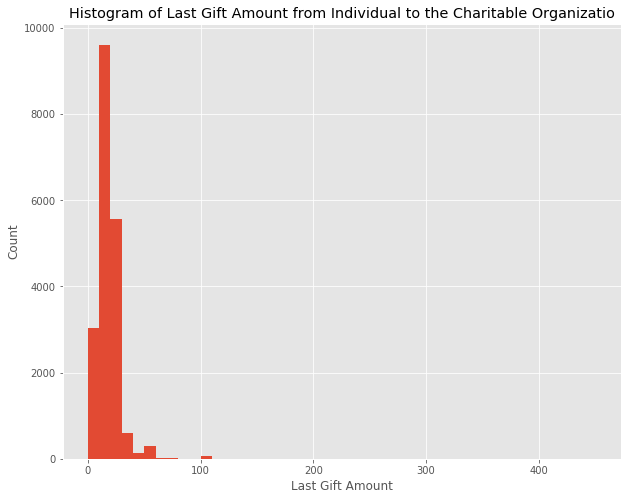

In [11]:
#Create Histogram of Last Gift Amount observation
plt.figure(figsize = (10, 8))
plt.title("Histogram of Last Gift Amount from Individual to the Charitable Organizatio")
plt.hist(df['LAST_GIFT_AMT'].values, bins = 45)
plt.xlabel("Last Gift Amount")
plt.ylabel("Count")
plt.show()

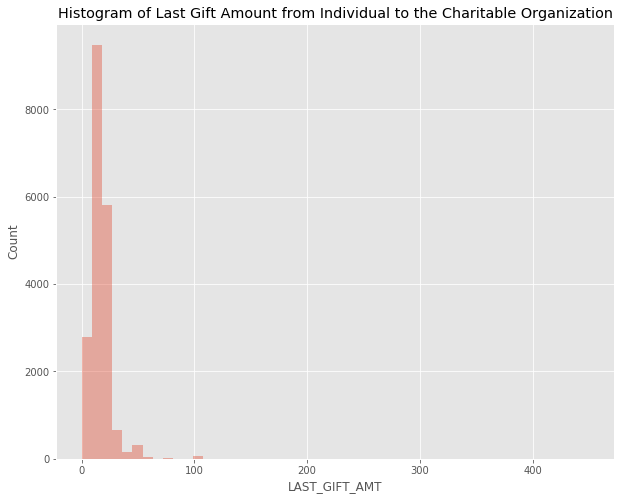

In [12]:
#Visualize with seaborn
plt.figure(figsize = (10, 8))
plt.ylabel("Count")
plt.title("Histogram of Last Gift Amount from Individual to the Charitable Organization")
sns.distplot(df.LAST_GIFT_AMT, kde=False)

In [13]:
#Providing mean, median and standard dwviation values
Last_Gift_Amount_Mean_Value = df['LAST_GIFT_AMT'].mean()
Last_Gift_Amount_Mean_Value

16.584503406979145

In [14]:
Last_Gift_Amount_Median_Value = df['LAST_GIFT_AMT'].median()
Last_Gift_Amount_Median_Value

15.0

In [15]:
Last_Gift_Amount_Stbadard_Deviation_Value = df['LAST_GIFT_AMT'].std()
Last_Gift_Amount_Stbadard_Deviation_Value

11.977709469261692

Providing Confidence Intervals for Last Gift Amount Varable

In [16]:
#Count number of zeros in the 'Last Gift Amount Variable'
print((df['LAST_GIFT_AMT'] ==0).sum())

75


In [17]:
#95% confidence level
z_critical_value = norm.ppf(0.975)
z_critical_value

1.959963984540054

In [18]:
sample = n = 19372- 75
n
margin_of_error = z_critical_value * (Last_Gift_Amount_Stbadard_Deviation_Value/math.sqrt(n))
confidence_interval = (Last_Gift_Amount_Mean_Value- margin_of_error, Last_Gift_Amount_Mean_Value + margin_of_error)


print("z_critical_value:", z_critical_value)
print("Confidence interval:")
print(confidence_interval)

z_critical_value: 1.959963984540054
Confidence interval:
(16.415507196105118, 16.753499617853173)


In [19]:
#considering continuous variables alone
continuous_variables = df.drop(['TARGET_B' ,'IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER', 'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'WEALTH_RATING', 'PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status'], axis =1)
continuous_variables.head(15)

,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,PCT_OWNER_OCCUPIED,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,MEDIAN_HOUSEHOLD_INCOME_IN_100,MEDIAN_HOME_VALUE_IN_100
0,0,89765,77,0.0,72,0.375,21.0,14,13,21,75,37400,108300
1,0,137263,137,0.0,97,0.222,18.0,37,14,18,127,26600,70500
2,0,89966,137,2.0,78,0.125,18.0,12,13,18,129,40700,80900
3,0,100147,137,2.0,79,0.125,17.0,10,7,15,130,25600,46400
4,0,148098,77,2.0,42,0.100,26.0,25,6,26,67,34200,162500
5,13,179339,53,4.0,90,0.500,16.0,9,13,16,53,63100,232100
6,0,7799,137,6.0,40,0.200,23.0,9,34,5,126,20300,64100
7,0,12542,137,6.0,80,0.333,16.0,10,31,8,125,49400,117700
8,0,36636,89,6.0,44,0.273,24.0,21,11,24,88,30300,169600
9,0,37268,125,6.0,67,0.182,17.0,27,13,17,124,24300,66200


In [20]:
continuous_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 13 columns):
TARGET_D                          19372 non-null int64
CONTROL_NUMBER                    19372 non-null int64
MONTHS_SINCE_ORIGIN               19372 non-null int64
DONOR_AGE                         14577 non-null float64
PCT_OWNER_OCCUPIED                19372 non-null int64
RECENT_CARD_RESPONSE_PROP         19372 non-null float64
MONTHS_SINCE_LAST_PROM_RESP       19126 non-null float64
LAST_GIFT_AMT                     19372 non-null int64
NUMBER_PROM_12                    19372 non-null int64
MONTHS_SINCE_LAST_GIFT            19372 non-null int64
MONTHS_SINCE_FIRST_GIFT           19372 non-null int64
MEDIAN_HOUSEHOLD_INCOME_IN_100    19372 non-null int64
MEDIAN_HOME_VALUE_IN_100          19372 non-null int64
dtypes: float64(3), int64(10)
memory usage: 1.9 MB


In [21]:
#correlation matrix for all continuos variables
corr = continuous_variables.corr()
corr

,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,PCT_OWNER_OCCUPIED,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,MEDIAN_HOUSEHOLD_INCOME_IN_100,MEDIAN_HOME_VALUE_IN_100
TARGET_D,1.000000,0.025529,0.003485,0.009811,0.009178,-0.003454,-0.005348,0.196432,0.054310,-0.033914,0.005893,0.069896,0.082961
CONTROL_NUMBER,0.025529,1.000000,-0.077874,-0.007441,-0.099438,0.019523,-0.004883,0.000228,-0.316467,0.046103,-0.086687,0.104717,0.258975
MONTHS_SINCE_ORIGIN,0.003485,-0.077874,1.000000,0.236176,0.036224,-0.197896,0.048813,-0.099205,0.149149,-0.027650,0.987825,-0.037086,-0.047490
DONOR_AGE,0.009811,-0.007441,0.236176,1.000000,-0.017776,-0.024603,-0.025662,-0.050276,0.093864,-0.081111,0.235322,-0.061093,-0.001373
PCT_OWNER_OCCUPIED,0.009178,-0.099438,0.036224,-0.017776,1.000000,-0.013065,0.001380,-0.002517,0.003003,0.011584,0.036404,0.443672,0.037510
RECENT_CARD_RESPONSE_PROP,-0.003454,0.019523,-0.197896,-0.024603,-0.013065,1.000000,-0.250381,-0.219906,0.007450,-0.186172,-0.197631,-0.016032,-0.012130
MONTHS_SINCE_LAST_PROM_RESP,-0.005348,-0.004883,0.048813,-0.025662,0.001380,-0.250381,1.000000,0.129642,-0.151291,0.672394,0.049261,0.017640,0.006121
LAST_GIFT_AMT,0.196432,0.000228,-0.099205,-0.050276,-0.002517,-0.219906,0.129642,1.000000,0.073477,0.090260,-0.100737,0.093304,0.106973
NUMBER_PROM_12,0.054310,-0.316467,0.149149,0.093864,0.003003,0.007450,-0.151291,0.073477,1.000000,-0.512797,0.162079,0.017326,0.031217
MONTHS_SINCE_LAST_GIFT,-0.033914,0.046103,-0.027650,-0.081111,0.011584,-0.186172,0.672394,0.090260,-0.512797,1.000000,-0.033261,0.008434,-0.011468


Text(0.5, 1.0, 'Heatmap Correlation for Continuos Variables')

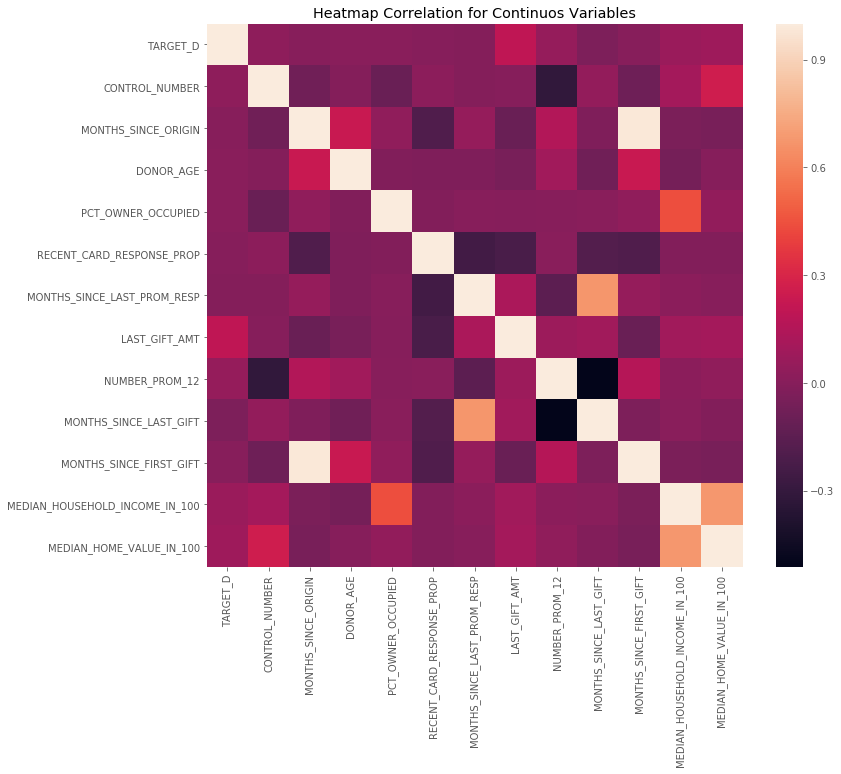

In [22]:
#heatmap correlation visualization
corr = continuous_variables.corr()
plt.figure(figsize=(12,10))
heatviz = sns.heatmap(data = corr)
plt.title('Heatmap Correlation for Continuos Variables')


Create a Chi-square Test of Association for All Categorial Variables

In [23]:
#considering categorical variables
categorical_variables = df[['TARGET_B' ,'IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER', 'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'WEALTH_RATING', 'PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status']]
categorical_variables.head(15)

,TARGET_B,IN_HOUSE,URBANICITY,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,WEALTH_RATING,PEP_STAR,RECENT_STAR_STATUS,recency_freq_status
0,0,0,S,20.0,U,M,2.0,1,3.0,0,0,A3
1,0,0,C,23.0,H,M,2.0,1,5.0,1,0,A3
2,0,0,C,23.0,H,M,5.0,0,6.0,1,0,A1
3,0,0,S,21.0,H,M,1.0,0,4.0,1,0,A2
4,0,0,S,20.0,H,F,5.0,1,5.0,1,0,A1
5,1,0,T,35.0,H,M,7.0,1,8.0,1,0,A4
6,0,1,U,9.0,U,F,1.0,0,8.0,1,0,A1
7,0,1,S,13.0,U,M,NaN,0,9.0,1,0,A3
8,0,0,C,23.0,H,F,1.0,0,8.0,0,0,A1
9,0,0,U,8.0,U,F,1.0,1,2.0,1,1,S2


In [24]:
categorical_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 12 columns):
TARGET_B               19372 non-null int64
IN_HOUSE               19372 non-null int64
URBANICITY             19372 non-null object
CLUSTER_CODE           18918 non-null float64
HOME_OWNER             19372 non-null object
DONOR_GENDER           19372 non-null object
INCOME_GROUP           14980 non-null float64
PUBLISHED_PHONE        19372 non-null int64
WEALTH_RATING          10562 non-null float64
PEP_STAR               19372 non-null int64
RECENT_STAR_STATUS     19372 non-null int64
recency_freq_status    19372 non-null object
dtypes: float64(3), int64(5), object(4)
memory usage: 1.8+ MB


In [25]:
categorical_variables.dtypes

TARGET_B                 int64
IN_HOUSE                 int64
URBANICITY              object
CLUSTER_CODE           float64
HOME_OWNER              object
DONOR_GENDER            object
INCOME_GROUP           float64
PUBLISHED_PHONE          int64
WEALTH_RATING          float64
PEP_STAR                 int64
RECENT_STAR_STATUS       int64
recency_freq_status     object
dtype: object

In [26]:
# Converting the categorical variables(as per data desciption) into object type
df[['IN_HOUSE', 'TARGET_B', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER','DONOR_GENDER',
    'INCOME_GROUP', 'PUBLISHED_PHONE','WEALTH_RATING','PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status']] = df[['IN_HOUSE', 'TARGET_B', 'URBANICITY','CLUSTER_CODE', 'HOME_OWNER','DONOR_GENDER', 'INCOME_GROUP','PUBLISHED_PHONE',
    'WEALTH_RATING','PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status']].astype('object')
df[['IN_HOUSE', 'TARGET_B', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER','DONOR_GENDER',
    'INCOME_GROUP', 'PUBLISHED_PHONE','WEALTH_RATING','PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status']].dtypes

IN_HOUSE               object
TARGET_B               object
URBANICITY             object
CLUSTER_CODE           object
HOME_OWNER             object
DONOR_GENDER           object
INCOME_GROUP           object
PUBLISHED_PHONE        object
WEALTH_RATING          object
PEP_STAR               object
RECENT_STAR_STATUS     object
recency_freq_status    object
dtype: object

0    75.0
1    25.0
Name: TARGET_B, dtype: float64


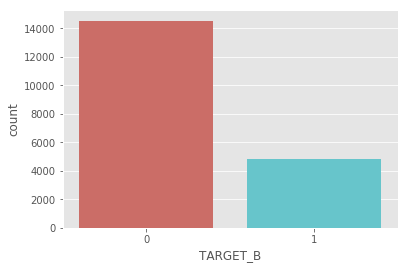

In [27]:
# Distribution of levels in the categorical variable
print(df['TARGET_B'].value_counts(normalize= True)*100)
sns.countplot(x='TARGET_B',data=df, palette='hls')

In [28]:
df.dtypes

TARGET_B                           object
TARGET_D                            int64
CONTROL_NUMBER                      int64
MONTHS_SINCE_ORIGIN                 int64
DONOR_AGE                         float64
IN_HOUSE                           object
URBANICITY                         object
CLUSTER_CODE                       object
HOME_OWNER                         object
DONOR_GENDER                       object
INCOME_GROUP                       object
PUBLISHED_PHONE                    object
WEALTH_RATING                      object
PCT_OWNER_OCCUPIED                  int64
PEP_STAR                           object
RECENT_STAR_STATUS                 object
recency_freq_status                object
RECENT_CARD_RESPONSE_PROP         float64
MONTHS_SINCE_LAST_PROM_RESP       float64
LAST_GIFT_AMT                       int64
NUMBER_PROM_12                      int64
MONTHS_SINCE_LAST_GIFT              int64
MONTHS_SINCE_FIRST_GIFT             int64
MEDIAN_HOUSEHOLD_INCOME_IN_100    

In [29]:
# Cheking for uninterpretable valuesin the variables
df['IN_HOUSE'].value_counts()
df['URBANICITY'].value_counts()
df['CLUSTER_CODE'].value_counts()
df['HOME_OWNER'].value_counts()
df['INCOME_GROUP'].value_counts()
df['PUBLISHED_PHONE'].value_counts()
df['WEALTH_RATING'].value_counts()
df['PEP_STAR'].value_counts()
df['RECENT_STAR_STATUS'].value_counts()

# Check if you would like to merge the value '1' into other categories
df['DONOR_GENDER'].value_counts()

# Check if there exists any possibility or merging entries with values less than 100
df['recency_freq_status'].value_counts()
df['TARGET_B'].value_counts()

0    14529
1     4843
Name: TARGET_B, dtype: int64

In [30]:
# Checking for missing values
categorical_variables.isnull().sum()

TARGET_B                  0
IN_HOUSE                  0
URBANICITY                0
CLUSTER_CODE            454
HOME_OWNER                0
DONOR_GENDER              0
INCOME_GROUP           4392
PUBLISHED_PHONE           0
WEALTH_RATING          8810
PEP_STAR                  0
RECENT_STAR_STATUS        0
recency_freq_status       0
dtype: int64

In [31]:
print((df[['IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'WEALTH_RATING', 'PEP_STAR', 'RECENT_STAR_STATUS' ]] =='?').sum())

IN_HOUSE                0
URBANICITY            454
CLUSTER_CODE            0
HOME_OWNER              0
INCOME_GROUP            0
PUBLISHED_PHONE         0
WEALTH_RATING           0
PEP_STAR                0
RECENT_STAR_STATUS      0
dtype: int64


In [32]:
# Replacing '?' values in 'URBANICITY' ('?' is a missing value)
df['URBANICITY'] = df['URBANICITY'].replace('?', np.NaN)

In [33]:
print((df[['IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'WEALTH_RATING', 'PEP_STAR', 'RECENT_STAR_STATUS' ]] =='?').sum())

IN_HOUSE              0
URBANICITY            0
CLUSTER_CODE          0
HOME_OWNER            0
INCOME_GROUP          0
PUBLISHED_PHONE       0
WEALTH_RATING         0
PEP_STAR              0
RECENT_STAR_STATUS    0
dtype: int64


In [35]:
from sklearn.impute import SimpleImputer
imputer_NaN = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

df['URBANICITY'] = imputer_NaN.fit_transform(df[['URBANICITY']])
df['CLUSTER_CODE'] = imputer_NaN.fit_transform(df[['CLUSTER_CODE']])
df['INCOME_GROUP'] = imputer_NaN.fit_transform(df[['INCOME_GROUP']])
df['WEALTH_RATING'] = imputer_NaN.fit_transform(df[['WEALTH_RATING']])

In [37]:
print(df.isnull().sum())

TARGET_B                             0
TARGET_D                             0
CONTROL_NUMBER                       0
MONTHS_SINCE_ORIGIN                  0
DONOR_AGE                         4795
IN_HOUSE                             0
URBANICITY                           0
CLUSTER_CODE                         0
HOME_OWNER                           0
DONOR_GENDER                         0
INCOME_GROUP                         0
PUBLISHED_PHONE                      0
WEALTH_RATING                        0
PCT_OWNER_OCCUPIED                   0
PEP_STAR                             0
RECENT_STAR_STATUS                   0
recency_freq_status                  0
RECENT_CARD_RESPONSE_PROP            0
MONTHS_SINCE_LAST_PROM_RESP        246
LAST_GIFT_AMT                        0
NUMBER_PROM_12                       0
MONTHS_SINCE_LAST_GIFT               0
MONTHS_SINCE_FIRST_GIFT              0
MEDIAN_HOUSEHOLD_INCOME_IN_100       0
MEDIAN_HOME_VALUE_IN_100             0
dtype: int64


Create chi-square test of association for norminal categorical variables and the target variable

In [38]:
#test association for 'UBANICITY' and 'TARGET_B'
cont = pd.crosstab(df['URBANICITY'],df['TARGET_B'])
chi,p_val,n,exp = chi2_contingency(cont)
chi,p_val,n,exp

(19.73797151201202, 0.0005625264707164846, 4, array([[3016.5 , 1005.5 ],
        [3003.75, 1001.25],
        [3708.75, 1236.25],
        [2958.  ,  986.  ],
        [1842.  ,  614.  ]]))

In [39]:
#test association for 'HOME_OWNER' and 'TARGET_B'
cont = pd.crosstab(df['HOME_OWNER'],df['TARGET_B'])
chi,p_val,n,exp = chi2_contingency(cont)
chi,p_val,n,exp

(3.484946804239553, 0.061929351732607794, 1, array([[7954.5, 2651.5],
        [6574.5, 2191.5]]))

In [40]:
#test association for 'DONOR_GENDER' and 'TARGET_B'
cont = pd.crosstab(df['DONOR_GENDER'],df['TARGET_B'])
chi,p_val,n,exp = chi2_contingency(cont)
chi,p_val,n,exp

(4.972669701447588, 0.17380937695876134, 3, array([[7.50000e-01, 2.50000e-01],
        [7.80075e+03, 2.60025e+03],
        [5.96475e+03, 1.98825e+03],
        [7.62750e+02, 2.54250e+02]]))

In [41]:
#test association for 'recency_freq_status' and 'TARGET_B'
cont = pd.crosstab(df['recency_freq_status'],df['TARGET_B'])
chi,p_val,n,exp = chi2_contingency(cont)
chi,p_val,n,exp

(435.75288406266964,
 1.660002372679204e-78,
 22,
 array([[5.10075e+03, 1.70025e+03],
        [1.72800e+03, 5.76000e+02],
        [1.21050e+03, 4.03500e+02],
        [8.99250e+02, 2.99750e+02],
        [1.98750e+02, 6.62500e+01],
        [3.75000e+01, 1.25000e+01],
        [3.22500e+01, 1.07500e+01],
        [5.17500e+01, 1.72500e+01],
        [1.08900e+03, 3.63000e+02],
        [3.97500e+01, 1.32500e+01],
        [4.50000e+00, 1.50000e+00],
        [7.50000e+00, 2.50000e+00],
        [6.52500e+01, 2.17500e+01],
        [3.00000e+00, 1.00000e+00],
        [1.50000e+00, 5.00000e-01],
        [3.27750e+02, 1.09250e+02],
        [2.75250e+02, 9.17500e+01],
        [2.24250e+02, 7.47500e+01],
        [6.67500e+01, 2.22500e+01],
        [5.70000e+01, 1.90000e+01],
        [1.05975e+03, 3.53250e+02],
        [1.01700e+03, 3.39000e+02],
        [1.03200e+03, 3.44000e+02]]))

In [42]:
# Chi-square test wrt to target variable
cont = pd.crosstab(df['URBANICITY'],df['TARGET_B'])
chi,p_val,n,exp = chi2_contingency(cont)
print("{} is the Chi-square value, {} is the p-value, {} is the degree of freedom, \n {} is the value of expected array".
      format(round(chi,2),round(p_val,5),n,exp))

#df[['IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER','DONOR_GENDER','INCOME_GROUP', 'PUBLISHED_PHONE',
#            'WEALTH_RATING','PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status']]

chi,p_val_IN_HOUSE,n,exp            = chi2_contingency(pd.crosstab(df['IN_HOUSE'],df['TARGET_B']))
chi,p_val_URBANICITY,n,exp          = chi2_contingency(pd.crosstab(df['URBANICITY'],df['TARGET_B']))
chi,p_val_CLUSTER_CODE,n,exp        = chi2_contingency(pd.crosstab(df['CLUSTER_CODE'],df['TARGET_B']))
chi,p_val_HOME_OWNER,n,exp          = chi2_contingency(pd.crosstab(df['HOME_OWNER'],df['TARGET_B']))
chi,p_val_DONOR_GENDER,n,exp        = chi2_contingency(pd.crosstab(df['DONOR_GENDER'],df['TARGET_B']))
chi,p_val_INCOME_GROUP,n,exp        = chi2_contingency(pd.crosstab(df['INCOME_GROUP'],df['TARGET_B']))
chi,p_val_PUBLISHED_PHONE,n,exp     = chi2_contingency(pd.crosstab(df['PUBLISHED_PHONE'],df['TARGET_B']))
chi,p_val_WEALTH_RATING,n,exp       = chi2_contingency(pd.crosstab(df['WEALTH_RATING'],df['TARGET_B']))
chi,p_val_PEP_STAR,n,exp            = chi2_contingency(pd.crosstab(df['PEP_STAR'],df['TARGET_B']))
chi,p_val_RECENT_STAR_STATUS,n,exp  = chi2_contingency(pd.crosstab(df['RECENT_STAR_STATUS'],df['TARGET_B']))
chi,p_val_recency_freq_status,n,exp = chi2_contingency(pd.crosstab(df['recency_freq_status'],df['TARGET_B']))

# Respective chi-square values are
print("\nDegree of association of all the categorical variables with respect to the target categorical variable  respectively is")
[p_val_IN_HOUSE,p_val_URBANICITY,p_val_CLUSTER_CODE,p_val_HOME_OWNER,p_val_DONOR_GENDER,p_val_INCOME_GROUP,
 p_val_PUBLISHED_PHONE,p_val_WEALTH_RATING,p_val_PEP_STAR,p_val_RECENT_STAR_STATUS,p_val_recency_freq_status]

19.74 is the Chi-square value, 0.00056 is the p-value, 4 is the degree of freedom, 
 [[3016.5  1005.5 ]
 [3003.75 1001.25]
 [3708.75 1236.25]
 [2958.    986.  ]
 [1842.    614.  ]] is the value of expected array

Degree of association of all the categorical variables with respect to the target categorical variable  respectively is


[1.4307180948504121e-08,
 0.0005625264707164846,
 3.6433819612251835e-06,
 0.061929351732607794,
 0.17380937695876134,
 8.59156329677041e-05,
 0.6661704569688127,
 0.0024623720099651134,
 1.312603216116283e-48,
 6.228206433390768e-41,
 1.660002372679204e-78]

In [43]:
#test association for 'DONOR_GENDER' and 'TARGET_B'
cont = pd.crosstab(df['DONOR_GENDER'],df['URBANICITY'])
chi,p_val,n,exp = chi2_contingency(cont)
chi,p_val,n,exp

(45.597353529632535,
 8.138405328551488e-06,
 12,
 array([[2.07619244e-01, 2.06741689e-01, 2.55265331e-01, 2.03592814e-01,
         1.26780921e-01],
        [2.15944776e+03, 2.15032031e+03, 2.65501471e+03, 2.11756886e+03,
         1.31864836e+03],
        [1.65119585e+03, 1.64421665e+03, 2.03012518e+03, 1.61917365e+03,
         1.00828866e+03],
        [2.11148771e+02, 2.10256298e+02, 2.59604842e+02, 2.07053892e+02,
         1.28936197e+02]]))

Interpretation of the results
<br>
The first value (chi) is the Chi-square value, followed by the p-value (p_val), then comes the degrees of freedom (n), and lastly it outputs the expected frequencies(exp) as an array
<br>
Since all of the expected frequencies are greater than 5, the chi2 test results can be trusted
<br>
We can reject the null hypothesis if the p-value is less than 0.05
<br>
The results indicate that there is a relationship between URBANCITY and TARGET_B(as p-value is less than 0.05).
<br>
Similar conclusions could be derived from the below calculations as well

In [44]:
#test association for 'DONOR_GENDER' and 'WEALTH_RATING'
cont = pd.crosstab(df['DONOR_GENDER'],df['WEALTH_RATING'])
chi,p_val,n,exp = chi2_contingency(cont)
chi,p_val,n,exp

(40.553042316860605,
 0.04544140913866081,
 27,
 array([[3.45343795e-02, 4.40842453e-02, 5.02787528e-02, 5.39954574e-02,
         5.09498245e-02, 5.56473260e-02, 5.76605410e-02, 6.18934545e-02,
         6.44228784e-02, 5.26533141e-01],
        [3.59192081e+02, 4.58520235e+02, 5.22949308e+02, 5.61606752e+02,
         5.29929125e+02, 5.78787838e+02, 5.99727287e+02, 6.43753820e+02,
         6.70062358e+02, 5.47647120e+03],
        [2.74651920e+02, 3.50602003e+02, 3.99866921e+02, 4.29425872e+02,
         4.05203954e+02, 4.42563184e+02, 4.58574282e+02, 4.92238643e+02,
         5.12355152e+02, 4.18751807e+03],
        [3.51214640e+01, 4.48336775e+01, 5.11334916e+01, 5.49133801e+01,
         5.18159715e+01, 5.65933306e+01, 5.86407702e+01, 6.29456432e+01,
         6.55180673e+01, 5.35484204e+02]]))

# Build a Linear Regression Model Using a Target Variable and Predictor Variables

In [45]:
df.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,RECENT_STAR_STATUS,recency_freq_status,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,MEDIAN_HOUSEHOLD_INCOME_IN_100,MEDIAN_HOME_VALUE_IN_100
0,0,0,89765,77,0.0,0,S,20,U,M,...,0,A3,0.375,21.0,14,13,21,75,37400,108300
1,0,0,137263,137,0.0,0,C,23,H,M,...,0,A3,0.222,18.0,37,14,18,127,26600,70500
2,0,0,89966,137,2.0,0,C,23,H,M,...,0,A1,0.125,18.0,12,13,18,129,40700,80900
3,0,0,100147,137,2.0,0,S,21,H,M,...,0,A2,0.125,17.0,10,7,15,130,25600,46400
4,0,0,148098,77,2.0,0,S,20,H,F,...,0,A1,0.100,26.0,25,6,26,67,34200,162500


Text(0.5, 1.0, 'Distribution of Amount of Donation to the Organization')

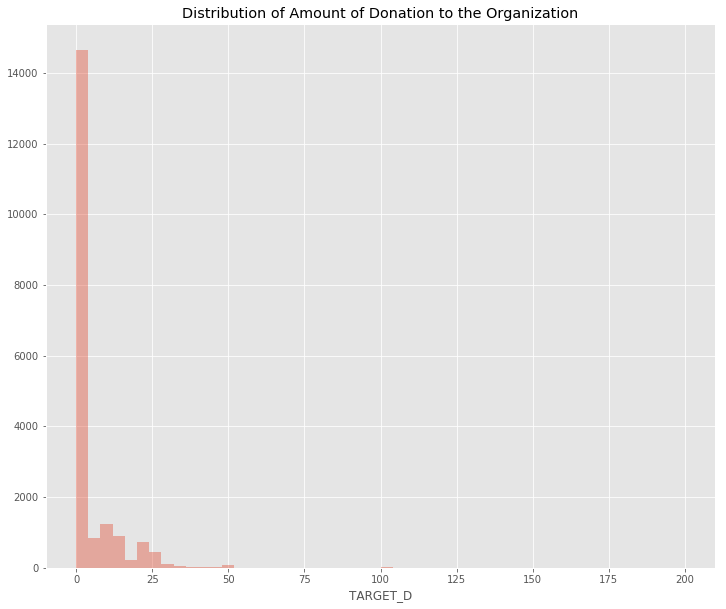

In [48]:
#visualizing the distribution of the target variable
plt.figure(figsize=(12,10))
sns.distplot(df['TARGET_D'], kde=False)
plt.title('Distribution of Amount of Donation to the Organization')

In [49]:
#Correlation matrix 
df.corr()

,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,PCT_OWNER_OCCUPIED,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,MEDIAN_HOUSEHOLD_INCOME_IN_100,MEDIAN_HOME_VALUE_IN_100
TARGET_D,1.000000,0.025529,0.003485,0.009811,0.009178,-0.003454,-0.005348,0.196432,0.054310,-0.033914,0.005893,0.069896,0.082961
CONTROL_NUMBER,0.025529,1.000000,-0.077874,-0.007441,-0.099438,0.019523,-0.004883,0.000228,-0.316467,0.046103,-0.086687,0.104717,0.258975
MONTHS_SINCE_ORIGIN,0.003485,-0.077874,1.000000,0.236176,0.036224,-0.197896,0.048813,-0.099205,0.149149,-0.027650,0.987825,-0.037086,-0.047490
DONOR_AGE,0.009811,-0.007441,0.236176,1.000000,-0.017776,-0.024603,-0.025662,-0.050276,0.093864,-0.081111,0.235322,-0.061093,-0.001373
PCT_OWNER_OCCUPIED,0.009178,-0.099438,0.036224,-0.017776,1.000000,-0.013065,0.001380,-0.002517,0.003003,0.011584,0.036404,0.443672,0.037510
RECENT_CARD_RESPONSE_PROP,-0.003454,0.019523,-0.197896,-0.024603,-0.013065,1.000000,-0.250381,-0.219906,0.007450,-0.186172,-0.197631,-0.016032,-0.012130
MONTHS_SINCE_LAST_PROM_RESP,-0.005348,-0.004883,0.048813,-0.025662,0.001380,-0.250381,1.000000,0.129642,-0.151291,0.672394,0.049261,0.017640,0.006121
LAST_GIFT_AMT,0.196432,0.000228,-0.099205,-0.050276,-0.002517,-0.219906,0.129642,1.000000,0.073477,0.090260,-0.100737,0.093304,0.106973
NUMBER_PROM_12,0.054310,-0.316467,0.149149,0.093864,0.003003,0.007450,-0.151291,0.073477,1.000000,-0.512797,0.162079,0.017326,0.031217
MONTHS_SINCE_LAST_GIFT,-0.033914,0.046103,-0.027650,-0.081111,0.011584,-0.186172,0.672394,0.090260,-0.512797,1.000000,-0.033261,0.008434,-0.011468


In [50]:
#Correlation matrix 
df.corr().describe()

,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,PCT_OWNER_OCCUPIED,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,MEDIAN_HOUSEHOLD_INCOME_IN_100,MEDIAN_HOME_VALUE_IN_100
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.108829,0.066330,0.151882,0.100449,0.111243,-0.007254,0.114437,0.093667,0.047025,0.072492,0.151978,0.175683,0.160369
std,0.274075,0.309259,0.389134,0.289161,0.295892,0.319489,0.340358,0.295228,0.344513,0.376566,0.389686,0.327810,0.318867
min,-0.033914,-0.316467,-0.197896,-0.081111,-0.099438,-0.250381,-0.250381,-0.219906,-0.512797,-0.512797,-0.197631,-0.061093,-0.047490
25%,0.003485,-0.077874,-0.047490,-0.025662,-0.002517,-0.197631,-0.005348,-0.050276,0.003003,-0.033914,-0.046176,-0.016032,-0.011468
50%,0.009811,0.000228,0.003485,-0.007441,0.009178,-0.016032,0.006121,0.073477,0.031217,-0.011468,0.005893,0.017640,0.031217
75%,0.069896,0.046103,0.149149,0.093864,0.036404,-0.003454,0.049261,0.106973,0.093864,0.046103,0.162079,0.104717,0.106973
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Heatmap Correlation for Sample Donor Dataset')

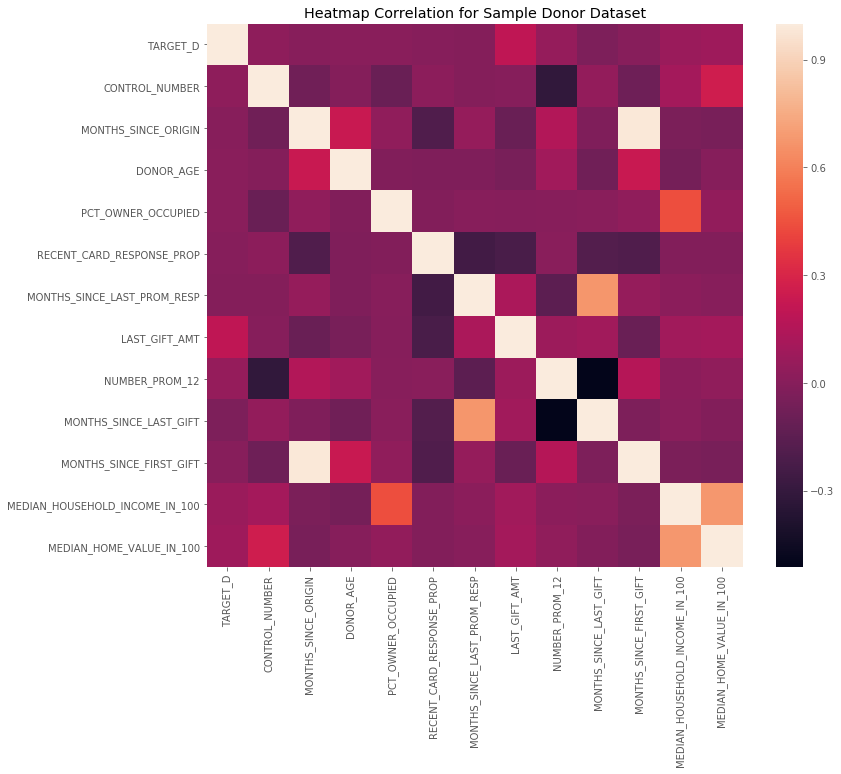

In [51]:
#heatmap correlation visualization
corr = df.corr()
plt.figure(figsize=(12,10))
heatviz = sns.heatmap(data = corr)
plt.title('Heatmap Correlation for Sample Donor Dataset')

Data Preparation and Cleaning

In [52]:
df.head(15)

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,RECENT_STAR_STATUS,recency_freq_status,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,MEDIAN_HOUSEHOLD_INCOME_IN_100,MEDIAN_HOME_VALUE_IN_100
0,0,0,89765,77,0.0,0,S,20,U,M,...,0,A3,0.375,21.0,14,13,21,75,37400,108300
1,0,0,137263,137,0.0,0,C,23,H,M,...,0,A3,0.222,18.0,37,14,18,127,26600,70500
2,0,0,89966,137,2.0,0,C,23,H,M,...,0,A1,0.125,18.0,12,13,18,129,40700,80900
3,0,0,100147,137,2.0,0,S,21,H,M,...,0,A2,0.125,17.0,10,7,15,130,25600,46400
4,0,0,148098,77,2.0,0,S,20,H,F,...,0,A1,0.100,26.0,25,6,26,67,34200,162500
5,1,13,179339,53,4.0,0,T,35,H,M,...,0,A4,0.500,16.0,9,13,16,53,63100,232100
6,0,0,7799,137,6.0,1,U,9,U,F,...,0,A1,0.200,23.0,9,34,5,126,20300,64100
7,0,0,12542,137,6.0,1,S,13,U,M,...,0,A3,0.333,16.0,10,31,8,125,49400,117700
8,0,0,36636,89,6.0,0,C,23,H,F,...,0,A1,0.273,24.0,21,11,24,88,30300,169600
9,0,0,37268,125,6.0,0,U,8,U,F,...,1,S2,0.182,17.0,27,13,17,124,24300,66200


In [53]:
#Total missing values for each feature
print(df.isnull().sum())

TARGET_B                             0
TARGET_D                             0
CONTROL_NUMBER                       0
MONTHS_SINCE_ORIGIN                  0
DONOR_AGE                         4795
IN_HOUSE                             0
URBANICITY                           0
CLUSTER_CODE                         0
HOME_OWNER                           0
DONOR_GENDER                         0
INCOME_GROUP                         0
PUBLISHED_PHONE                      0
WEALTH_RATING                        0
PCT_OWNER_OCCUPIED                   0
PEP_STAR                             0
RECENT_STAR_STATUS                   0
recency_freq_status                  0
RECENT_CARD_RESPONSE_PROP            0
MONTHS_SINCE_LAST_PROM_RESP        246
LAST_GIFT_AMT                        0
NUMBER_PROM_12                       0
MONTHS_SINCE_LAST_GIFT               0
MONTHS_SINCE_FIRST_GIFT              0
MEDIAN_HOUSEHOLD_INCOME_IN_100       0
MEDIAN_HOME_VALUE_IN_100             0
dtype: int64


In [54]:
#understanding zero observations in continuos variable
print((df[['CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN', 'DONOR_AGE', 'MEDIAN_HOME_VALUE_IN_100', 'MEDIAN_HOUSEHOLD_INCOME_IN_100', 'PCT_OWNER_OCCUPIED', 'RECENT_CARD_RESPONSE_PROP', 'MONTHS_SINCE_LAST_PROM_RESP','LAST_GIFT_AMT', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT' ]] ==0).sum())

CONTROL_NUMBER                       0
MONTHS_SINCE_ORIGIN                  0
DONOR_AGE                            2
MEDIAN_HOME_VALUE_IN_100           218
MEDIAN_HOUSEHOLD_INCOME_IN_100     174
PCT_OWNER_OCCUPIED                 218
RECENT_CARD_RESPONSE_PROP         3936
MONTHS_SINCE_LAST_PROM_RESP          0
LAST_GIFT_AMT                       75
NUMBER_PROM_12                       0
MONTHS_SINCE_LAST_GIFT               0
MONTHS_SINCE_FIRST_GIFT              0
dtype: int64


In [55]:
#checking for character symbols in missing variables
print((df[['IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER','DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'WEALTH_RATING','PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status']] =="?").sum())

IN_HOUSE               0
URBANICITY             0
CLUSTER_CODE           0
HOME_OWNER             0
DONOR_GENDER           0
INCOME_GROUP           0
PUBLISHED_PHONE        0
WEALTH_RATING          0
PEP_STAR               0
RECENT_STAR_STATUS     0
recency_freq_status    0
dtype: int64


In [56]:
#understanding zero observations in categorical variables
print((df[['IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER','DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'WEALTH_RATING','PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status']] ==0).sum())

IN_HOUSE               17954
URBANICITY                 0
CLUSTER_CODE               0
HOME_OWNER                 0
DONOR_GENDER               0
INCOME_GROUP               0
PUBLISHED_PHONE         9730
WEALTH_RATING            669
PEP_STAR                9600
RECENT_STAR_STATUS     15083
recency_freq_status        0
dtype: int64


In [57]:
#Total missing values for each feature
print(df.isnull().sum())

TARGET_B                             0
TARGET_D                             0
CONTROL_NUMBER                       0
MONTHS_SINCE_ORIGIN                  0
DONOR_AGE                         4795
IN_HOUSE                             0
URBANICITY                           0
CLUSTER_CODE                         0
HOME_OWNER                           0
DONOR_GENDER                         0
INCOME_GROUP                         0
PUBLISHED_PHONE                      0
WEALTH_RATING                        0
PCT_OWNER_OCCUPIED                   0
PEP_STAR                             0
RECENT_STAR_STATUS                   0
recency_freq_status                  0
RECENT_CARD_RESPONSE_PROP            0
MONTHS_SINCE_LAST_PROM_RESP        246
LAST_GIFT_AMT                        0
NUMBER_PROM_12                       0
MONTHS_SINCE_LAST_GIFT               0
MONTHS_SINCE_FIRST_GIFT              0
MEDIAN_HOUSEHOLD_INCOME_IN_100       0
MEDIAN_HOME_VALUE_IN_100             0
dtype: int64


In [58]:
df = df[['TARGET_D', 'TARGET_B', 'DONOR_AGE', 'MONTHS_SINCE_LAST_PROM_RESP', 'MEDIAN_HOUSEHOLD_INCOME_IN_100', 'MEDIAN_HOME_VALUE_IN_100', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',  'PCT_OWNER_OCCUPIED',  'RECENT_CARD_RESPONSE_PROP', 'LAST_GIFT_AMT', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT','HOME_OWNER', 'DONOR_GENDER', 'URBANICITY', 'recency_freq_status', 'CLUSTER_CODE', 'INCOME_GROUP', 'WEALTH_RATING', 'IN_HOUSE','PUBLISHED_PHONE', 'PEP_STAR', 'RECENT_STAR_STATUS']]

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 25 columns):
TARGET_D                          19372 non-null int64
TARGET_B                          19372 non-null object
DONOR_AGE                         14577 non-null float64
MONTHS_SINCE_LAST_PROM_RESP       19126 non-null float64
MEDIAN_HOUSEHOLD_INCOME_IN_100    19372 non-null int64
MEDIAN_HOME_VALUE_IN_100          19372 non-null int64
CONTROL_NUMBER                    19372 non-null int64
MONTHS_SINCE_ORIGIN               19372 non-null int64
PCT_OWNER_OCCUPIED                19372 non-null int64
RECENT_CARD_RESPONSE_PROP         19372 non-null float64
LAST_GIFT_AMT                     19372 non-null int64
NUMBER_PROM_12                    19372 non-null int64
MONTHS_SINCE_LAST_GIFT            19372 non-null int64
MONTHS_SINCE_FIRST_GIFT           19372 non-null int64
HOME_OWNER                        19372 non-null object
DONOR_GENDER                      19372 non-null object
UR

In [60]:
print(df.isnull().sum())

TARGET_D                             0
TARGET_B                             0
DONOR_AGE                         4795
MONTHS_SINCE_LAST_PROM_RESP        246
MEDIAN_HOUSEHOLD_INCOME_IN_100       0
MEDIAN_HOME_VALUE_IN_100             0
CONTROL_NUMBER                       0
MONTHS_SINCE_ORIGIN                  0
PCT_OWNER_OCCUPIED                   0
RECENT_CARD_RESPONSE_PROP            0
LAST_GIFT_AMT                        0
NUMBER_PROM_12                       0
MONTHS_SINCE_LAST_GIFT               0
MONTHS_SINCE_FIRST_GIFT              0
HOME_OWNER                           0
DONOR_GENDER                         0
URBANICITY                           0
recency_freq_status                  0
CLUSTER_CODE                         0
INCOME_GROUP                         0
WEALTH_RATING                        0
IN_HOUSE                             0
PUBLISHED_PHONE                      0
PEP_STAR                             0
RECENT_STAR_STATUS                   0
dtype: int64


In [61]:
#taking care of missing variables
from sklearn.impute import SimpleImputer
imputer_NaN = SimpleImputer(missing_values = np.nan, strategy = 'mean')


In [62]:
#imputing on continuous variable
df[['DONOR_AGE', 'MONTHS_SINCE_LAST_PROM_RESP']] =imputer_NaN.fit_transform(df[['DONOR_AGE', 'MONTHS_SINCE_LAST_PROM_RESP']])

In [63]:
print(df.isnull().sum())

TARGET_D                          0
TARGET_B                          0
DONOR_AGE                         0
MONTHS_SINCE_LAST_PROM_RESP       0
MEDIAN_HOUSEHOLD_INCOME_IN_100    0
MEDIAN_HOME_VALUE_IN_100          0
CONTROL_NUMBER                    0
MONTHS_SINCE_ORIGIN               0
PCT_OWNER_OCCUPIED                0
RECENT_CARD_RESPONSE_PROP         0
LAST_GIFT_AMT                     0
NUMBER_PROM_12                    0
MONTHS_SINCE_LAST_GIFT            0
MONTHS_SINCE_FIRST_GIFT           0
HOME_OWNER                        0
DONOR_GENDER                      0
URBANICITY                        0
recency_freq_status               0
CLUSTER_CODE                      0
INCOME_GROUP                      0
WEALTH_RATING                     0
IN_HOUSE                          0
PUBLISHED_PHONE                   0
PEP_STAR                          0
RECENT_STAR_STATUS                0
dtype: int64


In [64]:
print((df[['DONOR_AGE', 'MONTHS_SINCE_LAST_PROM_RESP']] ==0).sum())

DONOR_AGE                      2
MONTHS_SINCE_LAST_PROM_RESP    0
dtype: int64


In [66]:
#Get dummy variables
df = pd.get_dummies(df, prefix_sep='_', drop_first = True)
df.head(30)

,TARGET_D,DONOR_AGE,MONTHS_SINCE_LAST_PROM_RESP,MEDIAN_HOUSEHOLD_INCOME_IN_100,MEDIAN_HOME_VALUE_IN_100,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,PCT_OWNER_OCCUPIED,RECENT_CARD_RESPONSE_PROP,LAST_GIFT_AMT,...,WEALTH_RATING_4.0,WEALTH_RATING_5.0,WEALTH_RATING_6.0,WEALTH_RATING_7.0,WEALTH_RATING_8.0,WEALTH_RATING_9.0,IN_HOUSE_1,PUBLISHED_PHONE_1,PEP_STAR_1,RECENT_STAR_STATUS_1
0,0,0.0,21.0,37400,108300,89765,77,72,0.375,14,...,0,0,0,0,0,0,0,1,0,0
1,0,0.0,18.0,26600,70500,137263,137,97,0.222,37,...,0,1,0,0,0,0,0,1,1,0
2,0,2.0,18.0,40700,80900,89966,137,78,0.125,12,...,0,0,1,0,0,0,0,0,1,0
3,0,2.0,17.0,25600,46400,100147,137,79,0.125,10,...,1,0,0,0,0,0,0,0,1,0
4,0,2.0,26.0,34200,162500,148098,77,42,0.100,25,...,0,1,0,0,0,0,0,1,1,0
5,13,4.0,16.0,63100,232100,179339,53,90,0.500,9,...,0,0,0,0,1,0,0,1,1,0
6,0,6.0,23.0,20300,64100,7799,137,40,0.200,9,...,0,0,0,0,1,0,1,0,1,0
7,0,6.0,16.0,49400,117700,12542,137,80,0.333,10,...,0,0,0,0,0,1,1,0,1,0
8,0,6.0,24.0,30300,169600,36636,89,44,0.273,21,...,0,0,0,0,1,0,0,0,0,0
9,0,6.0,17.0,24300,66200,37268,125,67,0.182,27,...,0,0,0,0,0,0,0,1,1,1


In [68]:
#Distinguish between Matrix of features X and the Dependent Variable Vector y for a Linear Model
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [69]:
X

array([[0.00000000e+00, 2.10000000e+01, 3.74000000e+04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.80000000e+01, 2.66000000e+04, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 1.80000000e+01, 4.07000000e+04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [5.89190506e+01, 1.60000000e+01, 2.60000000e+04, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.89190506e+01, 1.50000000e+01, 2.80000000e+04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [5.89190506e+01, 1.90388999e+01, 2.03000000e+04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [70]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Build a Linear Regression Model using a target and predictor variables

In [71]:
import statsmodels.formula.api as smf
from sklearn import metrics

# create a fitted model with all features
lm1 = smf.ols(formula = 'y~X', data = df).fit()
lm1.mse_total

84.49437359147117

In [72]:
# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     273.5
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:55:40   Log-Likelihood:                -61294.
No. Observations:               19372   AIC:                         1.228e+05
Df Residuals:                   19260   BIC:                         1.237e+05
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.6321      5.451     11.124      0.000      49.949      71.316
X[0]          -0.0011      0.003     -0.352      0.725      -0.007       0.005
X[1]          -0.0122      0.018     -0.675      0.500      -0.048       0.023
X[2]        1.385e-05   5.17e-06      2.680      0.007    3.72e-06     2.4e-05
X[3]       -1.236e-07    7.3e-07     -0.169      0.865   -1.55e-06    1.31e-06
X[4]        1.347e-06   8.64e-07      1.559      0.119   -3.47e-07    3.04e-06
X[5]          -0.0033      0.007     -0.511      0.610      -0.016       0.009
X[6]          -0.0040      0.003     -1.392      0.164      -0.010       0.002
X[7]          -0.6229      0.293     -2.126      0.034      -1.197      -0.049
X[8]           0.1674      0.004     43.763      0.000       0.160       0.175
X[9]           0.0605      0.014      4.410      0.000       0.034       0.087
X[10]          0.0434      0.017      2.514      0.012       0.010       0.077
X[11]         -0.0026      0.007     -0.356      0.722      -0.017       0.012
X[12]         16.1046      0.097    165.477      0.000      15.914      16.295
X[13]          0.1593      0.096      1.654      0.098      -0.030       0.348
X[14]        -68.5181      5.767    -11.881      0.000     -79.822     -57.215
X[15]        -68.4341      5.767    -11.867      0.000     -79.738     -57.131
X[16]        -68.3291      5.770    -11.843      0.000     -79.638     -57.020
X[17]          3.6309      0.346     10.500      0.000       2.953       4.309
X[18]          3.9846      0.353     11.280      0.000       3.292       4.677
X[19]          2.7870      0.390      7.154      0.000       2.023       3.551
X[20]          4.3788      0.515      8.505      0.000       3.370       5.388
X[21]          0.1056      0.145      0.730      0.465      -0.178       0.389
X[22]         -0.3451      0.174     -1.988      0.047      -0.685      -0.005
X[23]         -1.0820      0.209     -5.188      0.000      -1.491      -0.673
X[24]          0.3360      0.377      0.892      0.372      -0.402       1.074
X[25]          1.8620      0.858      2.169      0.030       0.179       3.545
X[26]          1.7008      0.940      1.810      0.070      -0.142       3.543
X[27]         -0.4378      0.854     -0.513      0.608      -2.112       1.236
X[28]          0.1624      0.199      0.815      0.415      -0.228       0.553
X[29]          0.4421      0.803      0.551      0.582      -1.132       2.016
X[30]          1.1374      2.354      0.483      0.629      -3.477       5.752
X[31]         -1.4691      1.829     -0.803      0.422      -5.054       2.116
X[32]          0.1821      0.626      0.291      0.771      -1.046       1.410
X[33]          7.1990      2.879      2.500      0.012       1.555      12.843
X[34]          2.4223      4.074      0.595      0.552      -5.563      10.408
X[

In [73]:
#instantiate and fit Linear Regression Model
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(X, y)

#print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

64.4860131387584
[-1.05773564e-03 -1.22014036e-02  1.38465955e-05 -1.23595460e-07
  1.34673136e-06 -3.33527201e-03 -4.02052889e-03 -6.22872055e-01
  1.67370402e-01  6.04845416e-02  4.33592235e-02 -2.59690129e-03
  1.61045629e+01  1.59271598e-01 -6.85180588e+01 -6.84341187e+01
 -6.83290621e+01  7.34043758e-02  4.97687711e-01 -6.99910729e-01
  5.24895756e-01  1.05644528e-01 -3.45145128e-01 -1.08198063e+00
  3.35991215e-01  1.86202498e+00  1.70083259e+00 -4.37848996e-01
  1.62424180e-01  4.42121207e-01  1.13739690e+00 -1.46907117e+00
  1.82075444e-01  7.19897448e+00  2.42230983e+00  2.71997112e-01
 -1.72463886e-01 -2.05783067e-01  1.05394738e-01  1.11822642e+00
  1.14525026e+00  1.40678370e-01 -6.33752471e-03 -7.46810403e-01
 -2.98263585e-01 -5.68866745e-01 -3.54762129e-01 -6.93611625e-01
 -1.92826649e-01 -5.22364950e-01 -7.07880786e-01 -3.13288420e-01
 -5.06354698e-01 -5.11246793e-01 -9.28675613e-02 -9.59512221e-01
 -3.68408034e-01 -6.72581296e-01 -5.71201091e-01 -6.96589234e-01
 -1.4691

In [75]:
#pair the feature names with the coefficients
#list(zip(X, lm2.coef_ ))

Provide suggestions to either improve the model’s prediction or provide a new approach to the prediction

In [76]:
#Spliting dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [77]:
# Instantiate model
lm2 = LinearRegression()
# Fit model
lm2.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
# Predicting the Test set results
y_pred = lm2.predict(X_test)
# Model accuracy using RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred )))

4.950153133160607
